# Pearson's $\chi^2$ test to compare a sample vs. a PDF

With this test we can check the hipothesis that a sample has been generated from a given PDF. Given a sample:

* $(x_1, \ldots, x_N)$ of variance $\sigma_x^2$

We define a binning and count the number of objects in each interval:

* $a_1 \leq x < a_2 \longrightarrow N_1$
* $a_2 \leq x < a_3 \longrightarrow N_2$
* $a_3 \leq x < a_4 \longrightarrow N_3$
* ...

With $N = \sum_{i=1}^M N_i$. Then we predict the expected counts on the same bins from the PDF:

* $a_1 \leq x < a_2 \longrightarrow n_1$
* $a_2 \leq x < a_3 \longrightarrow n_2$
* $a_3 \leq x < a_4 \longrightarrow n_3$
* ...

where:

$n_i =N \int_{a_j}^{a_{j+1}} f(x) \; dx$

Using these "observed" and "predicted" counts we define a statistic:

$\chi^2 = \sum_{i=1}^M \frac{(N_i-n_i)^2}{n_i} $

If the null hipothesis is true, $M>>1$ and/or $N_i>>1$, then $\chi^2$ follows with good approximation a $\chi^2$ distribution with $K$ degrees of freedom, where: 

* $K = M$  if the data has been collected fixing N beforehand
* $K = M-1$	if the data has been collected and $f(x)$ has been normalized to N afterwards
* $K = M-1-p$ if $p$ additional parameters of $f(x)$ had been adjusted to the observations

For a perfect (ideal) match of the data and the PDF $\chi^2$ would be zero. The larger the value of $\chi^2$ the worse the fit. We define the significance of the test as $P(x \geq \chi^2)$.

## Use of the test with a sample from a uniform PDF

We can demonstrate the use of the test by generating a uniformly distributed sample and comparing it with a matching PDF.

__Note:__ the scipy chisquare function assumes a uniform distribution if no frequencies are given.

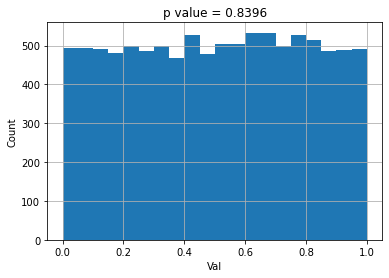

In [7]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the uniform distributionto use
# and number of points per sample
min= 0
max= 1
N= 10000

dist= scp.uniform(min,scale=max-min)

# Generate sample
x= dist.rvs(N)

# Plot histogram; we use the hist function to recover the counts per bin
h= plt.hist(x,20) # h[0] will be the counts per bin
plt.grid(True)
plt.xlabel('Val')
plt.ylabel('Count')

# Run test
c2_stat, p_val = scp.chisquare(h[0])   

t = plt.title("p value = {:.4f}".format(p_val))
plt.show()

## Uniform distribution: histogram of $\chi^2$ test p-values

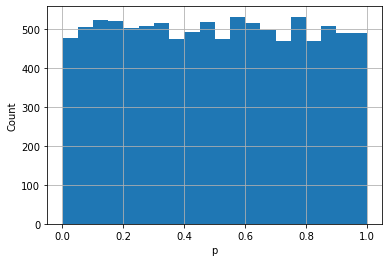

In [2]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the uniform distributionto use
# and number of points per sample
min= 0
max= 1
N= 1000
Nsamples= 10000

dist= scp.uniform(min,scale=max-min)

# Generate samples and collect p-values
bins= np.linspace(min,max,10)
p_values= []
for i in range(Nsamples):
    x= dist.rvs(N)
#     x= scp.norm.rvs(0.,1.,N)
    counts= np.histogram(x,bins)
    c2_stat, p_val = scp.chisquare(counts[0])  
    p_values.append(p_val)

# Plot histogram; we use the hist function to recover the counts per bin
h= plt.hist(p_values,20) # h[0] will be the counts per bin
plt.grid(True)
plt.xlabel('p')
plt.ylabel('Count')

plt.show()

## Normal distribution (wrong use): histogram of $\chi^2$ test p-values

__IMPORTANT!!__  This is a counter-example. The test may not be reliable when there are less than 40 bins or when
some of the bins have less than 5 counts. 

We apply the test here without respecting these conditions and we can see how the p-value is not well behaved.

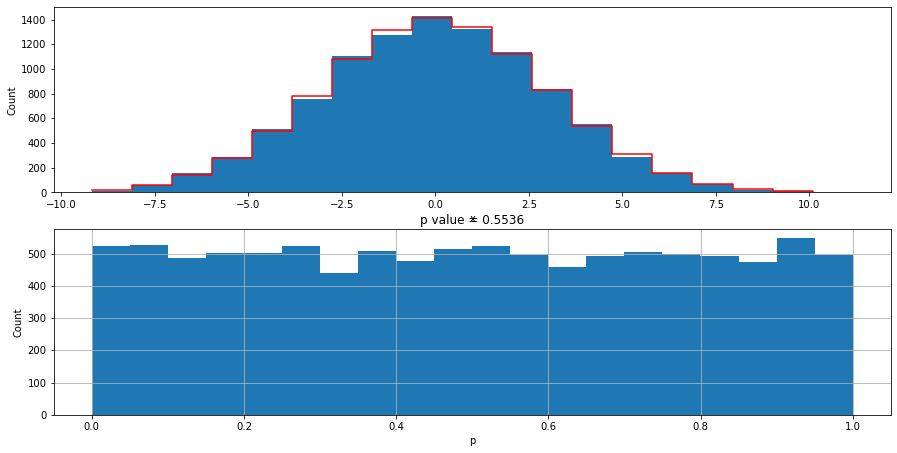

In [32]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the uniform distributionto use
# and number of points per sample
mu= 0
sig= 3
N= 10000
Nsamples= 10000

dist= scp.norm(mu,sig)

# Generate bins and predict counts from CDF
bins= np.linspace(dist.ppf(0.0011),dist.ppf(0.9999),20)
# print(bins)
p_bins= [ N*(dist.cdf(bins[i+1])-dist.cdf(bins[i])) for i in range(len(bins)-1)]

# Plot histogram of a single sample as a reference
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

p1= plt.subplot(2,1,1)
p= plt.step(bins[:-1],p_bins,where="post",color="red")
x= dist.rvs(N)
plt.xlabel('x')
plt.ylabel('Count')
p= plt.hist(x,bins)


# Generate samples and collect p-values
p_values= []
for i in range(Nsamples):
    x= dist.rvs(N)
    counts= np.histogram(x,bins)
    c2_stat, p_val = scp.chisquare(counts[0],p_bins)  
    p_values.append(p_val)

# Plot histogram of p-values
p1= plt.subplot(2,1,2)
h= plt.hist(p_values,20) # h[0] will be the counts per bin
plt.grid(True)
plt.xlabel('p')
plt.ylabel('Count')
t = plt.title("p value = {:.4f}".format(p_val))
plt.show()